# Chapter 6 -- Hierarchical Indexing----DRAFT

## Topics Covered

    MultiIndexing
    .xs for cross sections

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Index

Simply put, a MultiIndex (also refered to as an hierarchical index) allows multiple index levels within a single index.  Higher dimensional data can be represented in a one-dimensional Series or a two-dimensional DataFrame.  Start with the creation of a synthetic DataFrame whose values are used to represent the number of traffic violations issued in cell #3 below.  

pandas provide constructor methods allowing components to be defined separately.  The construction of the index and columns is self-explanatory.

For the data component:  The first date = assignment constructs an array using numpy's random number generator with the round() method used to return the integer portion.  The second date = assignment multiples the array of integers by 100 and floor divides them by 10, and finally taking the absolute value.

The tickets = assignment constructs the DataFrame from the constituents.

## MultiIndexing

In [30]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2, 3]],
                                   names=['year', 'month'])
columns=pd.MultiIndex.from_product([['city', 'suburbs', 'rural'], ['day', 'night']],
                                    names=['area', 'when'])

data = np.round(np.random.randn(6, 6))
data = abs(np.floor_divide(data[:] * 100, 10))

tickets2 = pd.DataFrame(data, index=index, columns=columns).sort_index().sort_index(axis=1)

In [2]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2, 3]],
                                   names=['year', 'month'])
columns=pd.MultiIndex.from_product([['city', 'suburbs', 'rural'], ['day', 'night']],
                                    names=['area', 'when'])

data = np.round(np.random.randn(6, 6))
data = abs(np.floor_divide(data[:] * 100, 10))

tickets = pd.DataFrame(data, index=index, columns=columns)

In [3]:
print(index)

MultiIndex(levels=[[2013, 2014], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=['year', 'month'])


Notice that the MultiIndex contains multiple levels of indexing, in this case the years and months, as well as multiple labels for each data point encoding these levels.

In [4]:
tickets

area        city       suburbs       rural      
when         day night     day night   day night
year month                                      
2013 1       0.0  10.0     0.0   0.0  30.0  10.0
     2      10.0  10.0     0.0  10.0   0.0  10.0
     3      10.0   0.0     0.0  20.0  10.0  10.0
2014 1      10.0   0.0    10.0  30.0  10.0  10.0
     2      10.0  10.0    20.0  10.0  10.0   0.0
     3       0.0  10.0    10.0   0.0  10.0  10.0

Another SAS-like way to think of a MultiIndex is to think of nested group-by's. e.g.

    proc sort data = tickets;
       by year month;
   
A close approximation of the tickets Dataframe is rendered using PROC TABULATE below.

````
    12       data tickets;
    13       length area $ 7;
    14       call streaminit(time());
    15       do year = 2013 to 2014;
    16          do month = 1 to 3;
    17             do area = 'City', 'Suburbs', 'Rural';
    18                do nd = 'Night', 'Day';
    19                   tickets = abs(int(rand( 'NORMAL')*100));
    20                   output;
    21                end;
    22             end;
    23          end;
    24       end;
    25       proc tabulate;
    26          var tickets;;
    27          class area nd year month;
    28             table year * month ,
    29                   area=' ' * nd=' ' * sum=' ' * tickets=' ';
````

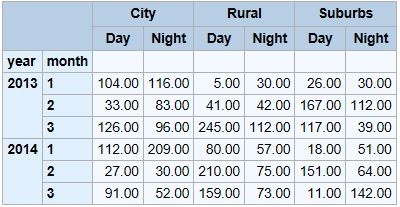

In [5]:
from IPython.display import Image
Image(filename='Anaconda3\\output\\tabulate.JPG')

The tickets DataFrame is essentially four-dimensional with area, when, year and month as dimensions.  The multi-indexing for both rows and columns make sub-setting operations very simply.  Indexing by 'rural' returns a DataFrame along that dimension.

In [6]:
tickets['rural']

when         day  night
year month             
2013 1      30.0   10.0
     2       0.0   10.0
     3      10.0   10.0
2014 1      10.0   10.0
     2      10.0    0.0
     3      10.0   10.0

Analgous to selecting a column in regular DataFrame you can select by label illustrated by the example in cell #6 above.

In [11]:
tickets['city', 'night']

year  month
2013  1        10.0
      2        10.0
      3         0.0
2014  1         0.0
      2        10.0
      3        10.0
Name: (city, night), dtype: float64

Multiple keys can be specified.  Above, the request is for those tickets issued at 'night' in the 'city'.   In this instance, a Series is returned.

The examples in cells #10 and #11 work by selecting from 'area' which is the highest MultiIndex level for columns in the tickets DataFrame.  Said another way, level 'when' is nested inside 'area'.

DataFrame have the xs() method for selecting a cross-section for hierarchical rows and columns.  The example below reutns the first month for all years.

## .xs for cross sections

In [12]:
tickets.xs((1), level='month')

area  city       suburbs       rural      
when   day night     day night   day night
year                                      
2013   0.0  10.0     0.0   0.0  30.0  10.0
2014  10.0   0.0    10.0  30.0  10.0  10.0

Likewise, you can request just the rows for 2013.

In [13]:
tickets.xs((2013), level='year')

area   city       suburbs       rural      
when    day night     day night   day night
month                                      
1       0.0  10.0     0.0   0.0  30.0  10.0
2      10.0  10.0     0.0  10.0   0.0  10.0
3      10.0   0.0     0.0  20.0  10.0  10.0

Selections can use multiple keys.  In this case, month 1 for 2013.

In [14]:
tickets.xs((2013, 1), level=('year', 'month'))

area       city       suburbs       rural      
when        day night     day night   day night
year month                                     
2013 1      0.0  10.0     0.0   0.0  30.0  10.0

The .xs method also works for columns with the optional axis=1 (for columns) argument.  In this case, the column 'night' in each of the 3 areas is selected.

In [16]:
tickets.xs(('night'), level='when', axis=1)

area        city  suburbs  rural
year month                      
2013 1      10.0      0.0   10.0
     2      10.0     10.0   10.0
     3       0.0     20.0   10.0
2014 1       0.0     30.0   10.0
     2      10.0     10.0    0.0
     3      10.0      0.0   10.0

## Index Slices

In [32]:
tickets.loc[(slice(2013)), 'suburbs']

when        day  night
year month            
2013 1      0.0    0.0
     2      0.0   10.0
     3      0.0   20.0

In [34]:
tickets.loc[(slice(None),(slice(1,2))), 'suburbs']

when         day  night
year month             
2013 1       0.0    0.0
     2       0.0   10.0
2014 1      10.0   30.0
     2      20.0   10.0

In [45]:
tickets.loc[[1],['city', 'suburbs']]

KeyError: 'cannot index a multi-index axis with these keys'

DataFrames with hierarchical can use the .stack and .unstack attrributes to reshape data from 'tall and skinny' to 'short and fat' formats and vice-versa.  

The .stack attribute pivots columns into rows.  The .unstac attribute pivots rows into columns.  To begin, consider the examples in cells #xx to #xx below.  Cell #xx below creates a DataFrame with a MultiIndex.

In [ ]:
tickets.stack
tickets

In [ ]:
df = DataFrame(np.random.randn(4, 2),
               index=[list('AB'*2), list('CDEF')],
               columns=list('XY'))
df.index.names = ['idx1', 'idx2']
print(df)

In [ ]:
# Create a toy DF with a Hierarchical Index
df = DataFrame(np.random.randn(4, 2),
               index=[list('AB'*2), list('CDEF')],
               columns=list('IJ'))
df.index.names = ['idx1', 'idx2']
print(df)

In [ ]:
df_s = df.stack()
print(df_s)

In [ ]:
df_u = df_s.unstack()
print(df_u)

In [ ]:
iterables = [['bar', 'baz', 'foo', 'qux'], ['one', 'two']]
pd.MultiIndex.from_product(iterables, names=['first', 'second'])
arrays = [np.array(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux']),
         np.array(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'])]

In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), index=arrays)

In [ ]:
df.index

In [ ]:
df[0]